Arden Chaing

Phys 434

November 15th, 2020

Lab 5

In this problem we will be looking for the standard model of the Higgs Boson, in proton-proton collisions at center of mass energy of 13 TeV, at the Large Hadron Collider(LHC). I'm using the second data set provided.

What is the Higg Boson? Put simply, the Higgs boson is what allows us to explain why subatomic particles have mass. The Higgs boson operates on the theory of an energy field that permeates the entire universe(known as the Higgs field). The mass of subatomic particles is determined by how much they interact with this Higgs field. Using water as an analogy for the Higgs field: a fish moving really smoothly through water because its body is streamlined, is analagous to a low-mass particle with minimal interaction with the Higgs field. While a human swimming and splashing through the water, is analogous to a massive particle, heavily interacting with the higgs field. Just like a pool is made up of water molecules, so is the Higgs field made up of Higgs bosons.

What is the Large Hadron Collider? And how does it relate? The Large Hadron Collider is a 27 kilometer long particle accelerator that smashes protons against each other. By smashing protons against each other scientists can find what protons are made out of(neutrons, kaons, pions, muons, neutrinos), as well as interact with the higgs field. Smashing protons creates quantum excitation in the higgs field, which creates the possibility of flicking off a higgs particle. This event is extrememly rare and happens approximately once in every trillion pp collisions. The Higgs bosons are produced with large transverse momentum (pT) and decaying to a bottom quark-antiquark pair. The Higgs candidates could be reconstructed as large-radius jets using Calorimeters.


A jet is a phenomenon caused by collections of collimated hadrons meaning that they are traveling in relatively the same direction. These jets are created in two ways, through showering and hadronization. First is showering. 
* Caused by a single quark or gluon radiating gluons. 
* These gluons can either repeat the process and radiate more gluons or decay depending on their energy.
* Upon decaying into quark anti-quark pairs, they create 'parton showers'

Now for hadronization.
* The process in which quarks and gluons are bound into hadrons

When these particles are recorded by the calorimeters they create clusters of detections that correspond to some original quark or gluon, and in order to determine the original quark or gluon these detections came from we need to group them together. These jets can then be given variables like mass, angular information, transverse momentum, as well as substructure variables which describe the shape of the jet. Sometimes a jet can be split into multiple distinct jets corresponding to seperate gluons or quarks. This often results from the decay of a boson that creates highly collimated particles whcih will create seperate jets that are close to one another. This is done numerically by grouping into sub-jets and finding the average distance to the sub-jet from the detections. as you increase the number of sub-jets the average distance will always decrease, so by using the ratio of the average distance for N sub-jets to the average distance for N-1 sub-jets, the number of independant sub-jets can be found.

What are our data sets categories? 

* pt - Corresponds to the transverse momentum in the xy-plane of the proton to proton collisions in the LHC.
* eta(n) - or theta is the pseudorapidity, or the angle of a particle relative to the beam axis. The angle of the particle in the z-y plane.
* phi - The azimuthal angle responsible for the angle of the particle in x-y plane.
* mass - invariant mass, or the intrinsic mass of the system of objects independent of the overall motion of the system.
* ee2(e2) - 2-point ECF ratio, is the energy correlation function ratio for 2-point correlators. Particularly useful for quark/gluon discrimination.
* ee3(e3) - 3-point ECF ratio, is the energy correlation function ratio for 3-point correlators. Particularly useful for boosted W/Z/Higgs boson identification.
* d2 - 3 to 2 point ECF ratio
* angularity(tau) - Specific orientation of one feature to another at a referenced angle.
* Jet - signatures of quarks,gluons,etc. created in high-energy collisions.
* N- subjettiness - a jet shape designed to identify boosted hadronic objects such as top quarks. Given N subjet axes within a jet, N-subjettiness sums the angular distances of jet constituents to their nearest subjet axis.
* t1 - 1-subjettiness
* t2 - 2-subjettiness
* t3 - 3-subjettiness
* t21 - 21-subjettiness
* t32 - 32-subjettiness
* KtDeltaR - delta R of two subjets within the large-R jet

In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle
import pandas as pd

plt.rcParams["figure.figsize"] = (20,60)

infile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
higgs_data = pickle.load(infile)

infile2 = open ("qcd_100000_pt_1000_1200.pkl",'rb')
qcd_data = pickle.load(infile2)

# list all keys of the files
print("Higgs Signal categories: ", higgs_data.keys())
print("QCD background categories: ", qcd_data.keys())

Higgs Signal categories:  Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
QCD background categories:  Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


In [4]:
signal = np.array(higgs_data)
qcd = np.array(qcd_data)

In [5]:
higgs_table = pd.DataFrame(higgs_data)
qcd_table = pd.DataFrame(qcd_data)
higgs_table.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
qcd_table.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']

In [6]:
higgs_table

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1130.533498,0.075569,-2.535979,126.390705,0.050194,0.000198,1.565921,0.000846,0.710011,0.318588,0.201156,0.448709,0.631396,0.236212
1,1040.287356,-0.917809,-0.511002,125.735472,0.068068,0.000259,0.822408,0.000093,1.070693,0.243505,0.149150,0.227427,0.612512,0.223529
2,1042.978241,0.431547,-1.287136,125.946948,0.054627,0.000189,1.159519,0.000493,0.707240,0.196842,0.161801,0.278324,0.821986,0.284253
3,1173.988224,-1.000457,-0.567291,133.475055,0.057164,0.000211,1.131290,0.000316,1.586268,0.213899,0.137810,0.134844,0.644277,0.216328
4,1158.143085,-0.205305,2.778395,135.047319,0.028222,0.000114,5.084335,0.004804,0.644669,0.259307,0.242958,0.402232,0.936954,0.443097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1081.930827,-0.292886,-0.066601,128.449819,0.062010,0.000188,0.788336,0.000623,0.984561,0.132130,0.106621,0.134201,0.806947,0.223551
99996,1114.171856,-0.071148,-0.518420,128.133729,0.060090,0.000269,1.239701,0.000745,0.863711,0.297420,0.248208,0.344352,0.834536,0.224712
99997,1066.593095,0.776745,-2.067399,125.351507,0.063063,0.000260,1.036221,0.000161,1.545428,0.230121,0.177881,0.148904,0.772991,0.231622
99998,1043.746312,-0.403642,1.761954,125.477362,0.065217,0.000204,0.736390,0.000253,1.147794,0.208940,0.162744,0.182036,0.778902,0.222911


In [7]:
qcd_table

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1034.181543,1.193191,2.942234,272.010881,0.102485,0.003492,3.244343,0.006256,0.961697,0.598986,0.425024,0.622843,0.709573,0.082995
1,1125.535509,-1.833090,0.121390,139.794408,0.035430,0.000288,6.481473,0.000155,0.896003,0.633385,0.476566,0.706900,0.752412,0.439346
2,1099.223087,0.557867,-1.238027,245.413146,0.099080,0.002563,2.634788,0.005682,0.861678,0.486505,0.264631,0.564602,0.543942,0.251453
3,1118.230032,1.505473,1.953123,89.975916,0.017950,0.000077,13.389845,0.000432,0.952917,0.856141,0.730438,0.898442,0.853175,0.121666
4,1059.907996,-0.387179,-1.064832,85.893956,0.018515,0.000072,11.342156,0.002575,0.868770,0.645362,0.484853,0.742845,0.751289,0.386788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1185.924965,-1.282700,-2.203558,178.917178,0.051779,0.000606,4.368135,0.000900,0.671057,0.294523,0.255893,0.438894,0.868838,0.282015
99996,1070.385446,-0.762397,-2.405166,143.872351,0.032136,0.000224,6.749812,0.002829,0.718651,0.293553,0.268076,0.408478,0.913209,0.261662
99997,1116.722590,-0.166511,-1.141038,118.185074,0.049617,0.000331,2.712970,0.002456,0.859900,0.642900,0.456476,0.747645,0.710027,0.147913
99998,1147.609045,0.405501,-1.125710,292.925318,0.129771,0.004310,1.972101,0.005786,0.930685,0.672938,0.361115,0.723057,0.536624,0.567817


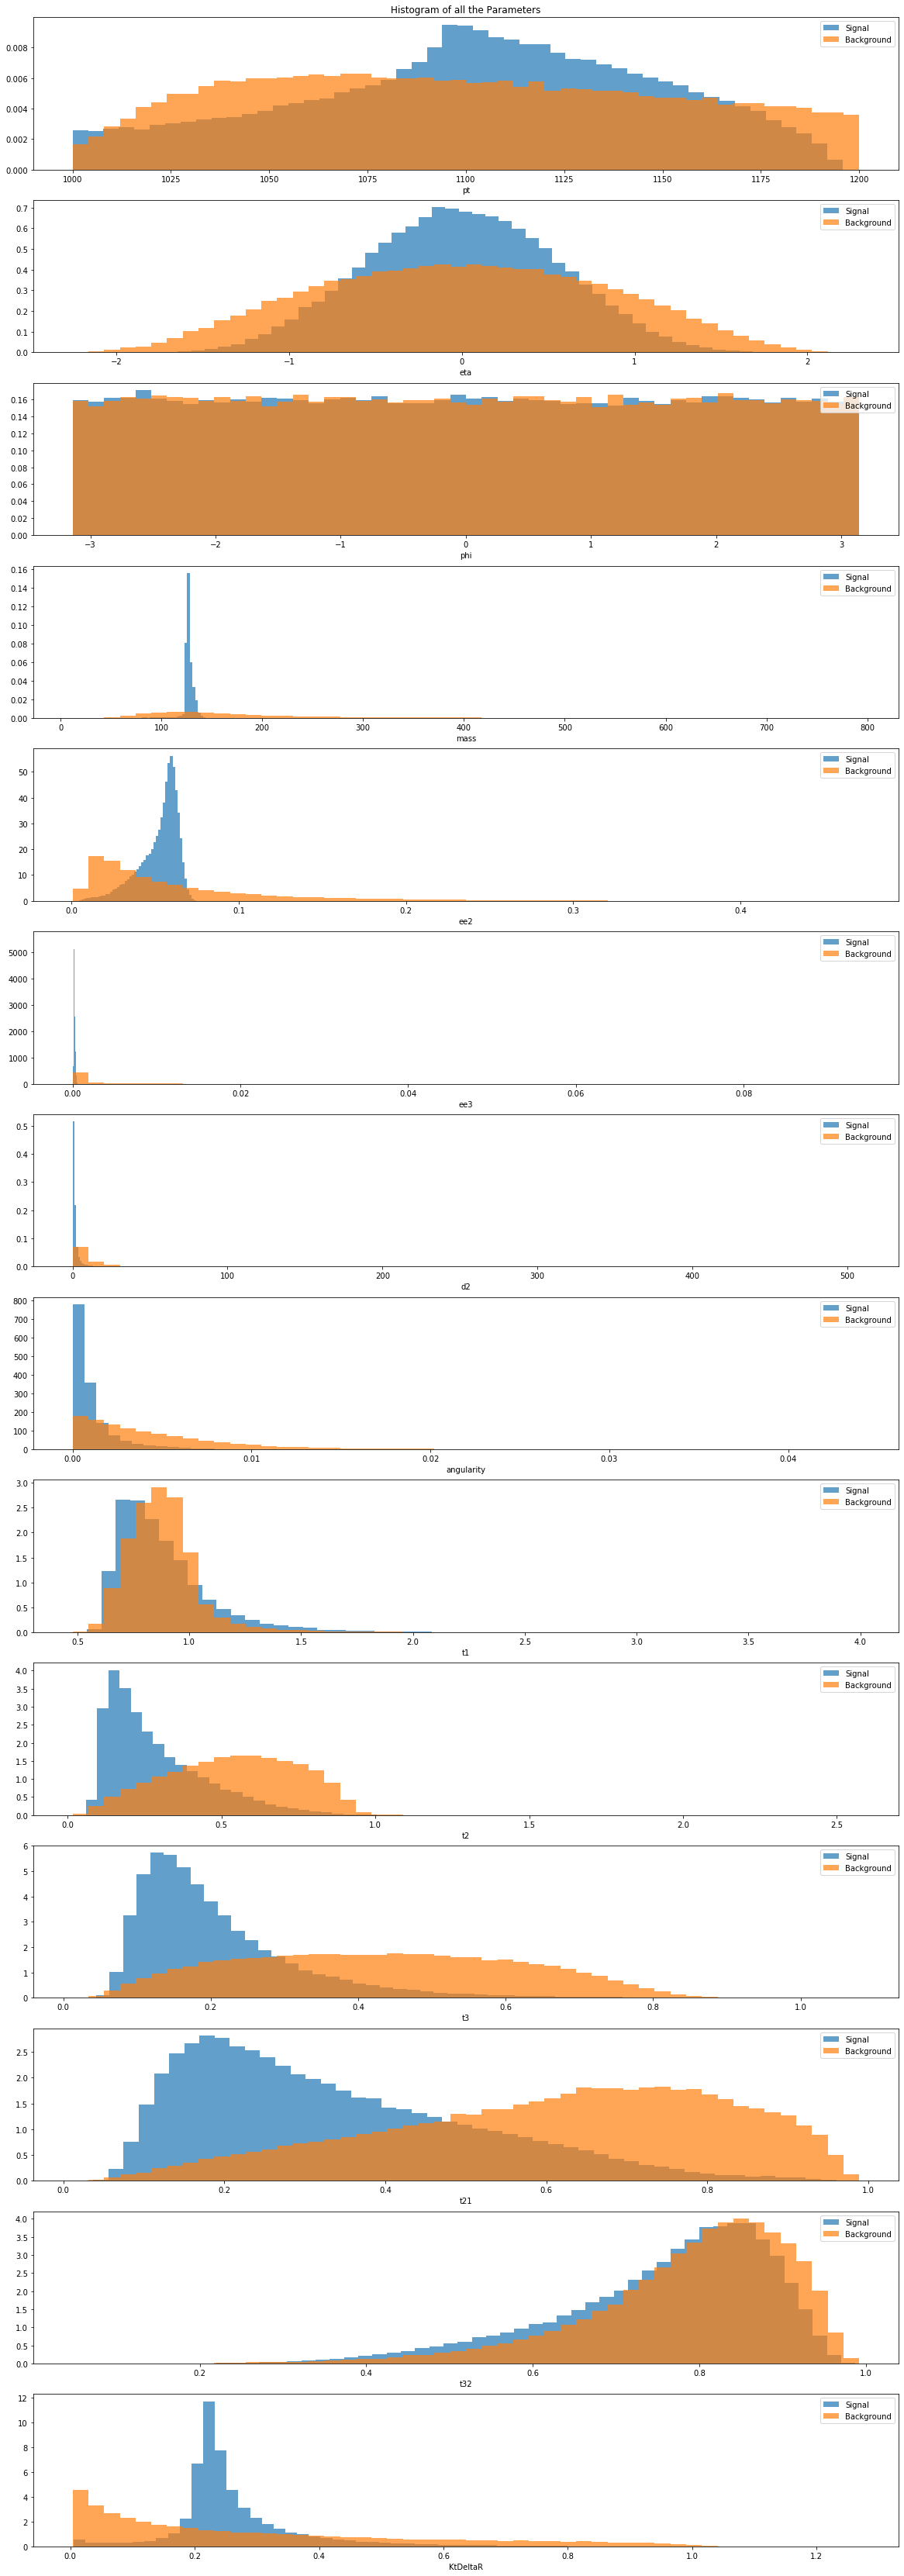

In [23]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14) = plt.subplots(14,1)
axes = (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14)
labels = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
axes[0].set_title("Histogram of all the Parameters")
for i in range(0,14):
    axes[i].hist(signal[:,i],bins = 50, density = True, alpha = 0.7, label="Signal")
    axes[i].hist(qcd[:,i],bins = 50, density = True, alpha = 0.7, label = "Background")
    axes[i].set_xlabel(labels[i])
    axes[i].legend(loc = 'best')
plt.show()

Above is a set of histograms of each field for each feature in both the background and signal data sets. Phi and t32 are the features which from a simple histogram doesn't obviously discriminate the background data from signal data.

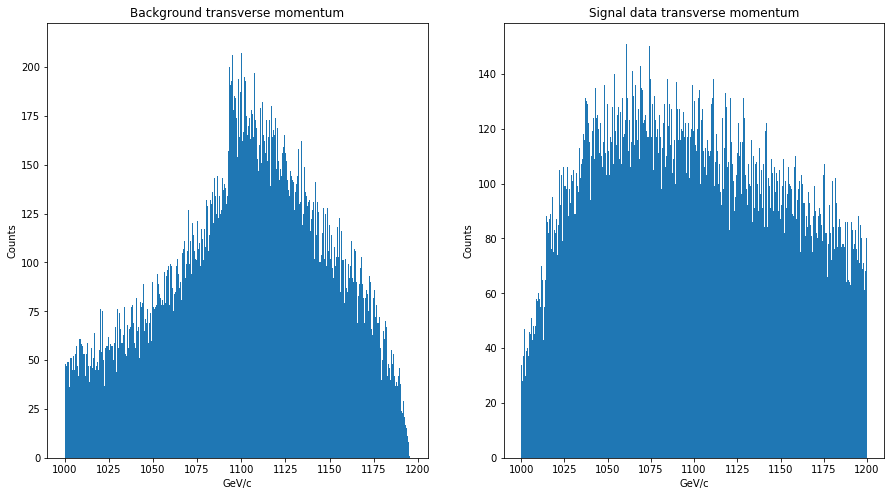

In [28]:
fig, a = plt.subplots(1, 2, figsize = (15, 8))

a[0].hist(higgs_data.get('pt'), bins = 1000)
a[0].set_title('Background transverse momentum')
a[0].set_ylabel('Counts')
a[0].set_xlabel('GeV/c')
a[1].hist(qcd_data.get('pt'), bins = 1000)
a[1].set_title('Signal data transverse momentum')
a[1].set_ylabel('Counts')
a[1].set_xlabel('GeV/c')

plt.show()

We first examine the variable 'pt', which represents transverse momentum. This is the components of momentum of the collision products in the plane perpindicular to the axis of the beam of particles. It is expected that most momentum in the colliding particles will cancel, so this momentum is indicative of there being other particles unaccounted for among the collision products. Notable is that the signal data is sharply peaked around 1115 GeV/c, where I am assuming this to be the units of momentum, as we are working in particle physics, while the background data is more gently peaked, at a different value. Thus, the signal follows a qualitatively different distribution.

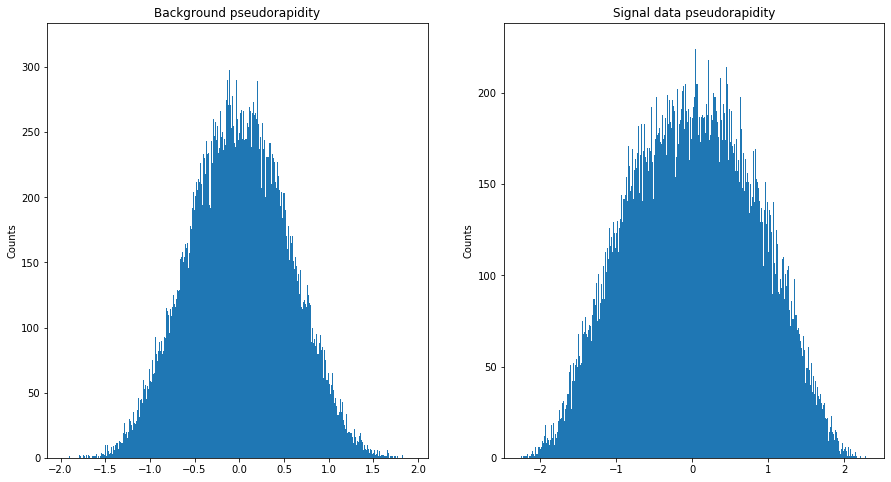

In [29]:
fig, a = plt.subplots(1, 2, figsize = (15, 8))

a[0].hist(higgs_data.get('eta'), bins = 1000)
a[0].set_title('Background pseudorapidity')
a[0].set_ylabel('Counts')
a[1].hist(qcd_data.get('eta'), bins = 1000)
a[1].set_title('Signal data pseudorapidity')
a[1].set_ylabel('Counts')

plt.show()

This is the pseudorapidity, or, a measure of the angle between the particle beam and the 3-momentum of the collision products. A larger magnitude pseudorapidity corresponds to the collision products more closely aligning with the beam, but this is a signed quantity: we have $\eta = 0$ when $\theta = \frac{\pi}{2}$, $\theta \to 0 \implies \eta \to \infty$, and $\theta \to \pi \implies \eta \to -\infty$. We see that pseudorapidity looks roughly normally distributed about 0 in both data sets, below. However, the signal data is more tightly clustered about 0.

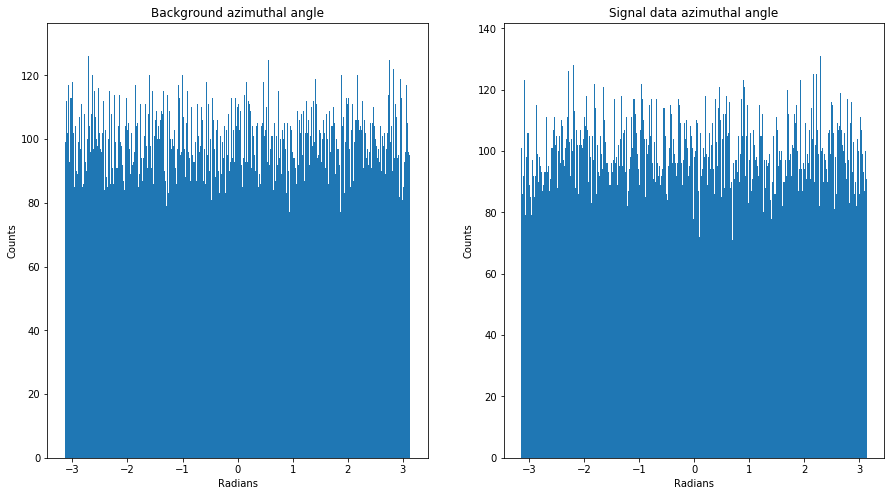

In [30]:
fig, a = plt.subplots(1, 2, figsize = (15, 8))

a[0].hist(higgs_data.get('phi'), bins = 1000)
a[0].set_title('Background azimuthal angle')
a[0].set_ylabel('Counts')
a[0].set_xlabel('Radians')
a[1].hist(qcd_data.get('phi'), bins = 1000)
a[1].set_title('Signal data azimuthal angle')
a[1].set_ylabel('Counts')
a[1].set_xlabel('Radians')

plt.show()

This is the azimuthal angle, the angle in the transverse plane between $p_T$ and the horizontal. It, along with pseudorapidity, can characterize the direction of a jet. It seems to be approximately uniformly distributed, in both data sets.

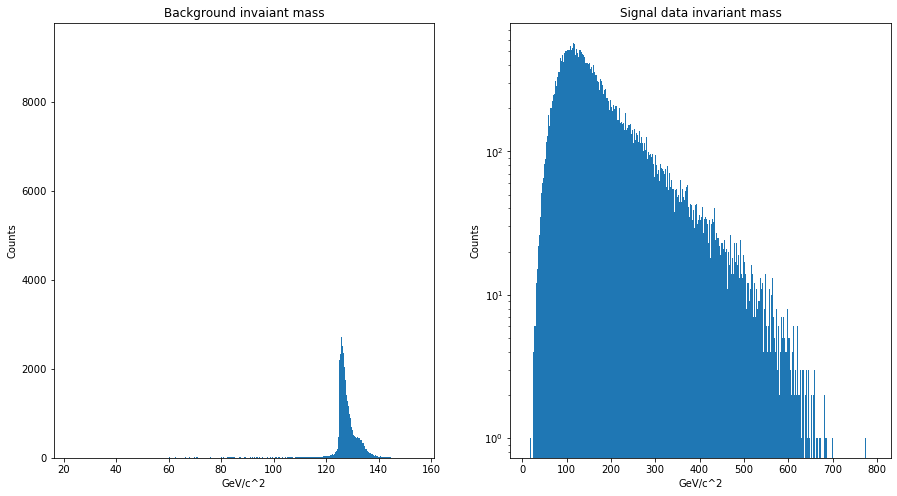

In [31]:
fig, a = plt.subplots(1, 2, figsize = (15, 8))

a[0].hist(higgs_data.get('mass'), bins = 1000)
a[0].set_title('Background invaiant mass')
a[0].set_ylabel('Counts')
a[0].set_xlabel('GeV/c^2')
a[1].hist(qcd_data.get('mass'), bins = 1000)
a[1].set_title('Signal data invariant mass')
a[1].set_ylabel('Counts')
a[1].set_xlabel('GeV/c^2')
a[1].set_yscale('log')

plt.show()

The invariant mass associated to the jet. This is the frame independent quantity $\sqrt{E^2 - p^2} = m$, which is a Lorentz scalar. This is rather sharply peaked, and if we recall the predicted Higgs mass is roughly 125 GeV/c^2, we see this is very close to the peak, in both cases. This reveals the horizontal axis to be GeV/c^2. The long upper tail of measured masses is fine - no one requires that these Higgs bosons be on shell, though it is vastly more likely they are than not. For signal data, we notice the peaking is extreme compared to the background. To demonstrate how extreme, note I have changed the vertical scaling on the signal data, but it still looks heavily peaked.

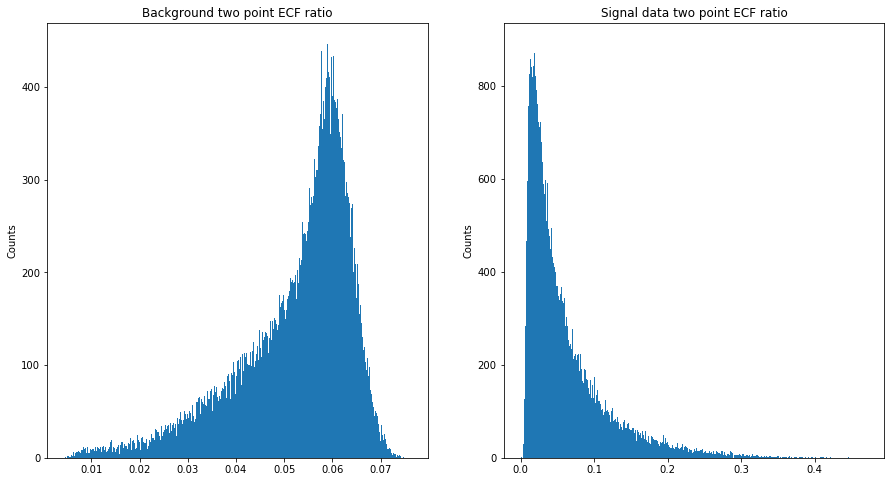

In [32]:
fig, a = plt.subplots(1, 2, figsize = (15, 8))

a[0].hist(higgs_data.get('ee2'), bins = 1000)
a[0].set_title('Background two point ECF ratio')
a[0].set_ylabel('Counts')
a[1].hist(qcd_data.get('ee2'), bins = 1000)
a[1].set_title('Signal data two point ECF ratio')
a[1].set_ylabel('Counts')

plt.show()

This is a bit trickier. This refers to the two-point energy correlation function ratio of the jet; this is the sum $\sum_{i&lt;j \in J} p_{T,i} p_{T,j} \Delta R_{ij} \frac{1}{p_{T,J}^2}$, where the subscripts enumerate particles of a jet $J$, and $\Delta R_{ij}$ is the "Euclidean angular distance" $R_{ij}^2 = (\eta_i - \eta_j)^2 + (\phi_i - \phi_j)^2$. A wider spread indicates a lot of energy in the center of mass frame, and it is less likely an event occurs with so much surplus energy in the background. Dividing by the overall transverse momentum of the jet further depresses the value of this variable. The difference between the background and signal data here is striking: the background mean is close to 0, but has a long tail towards larger values, while the signal data is much more clustered, with a very small tail.

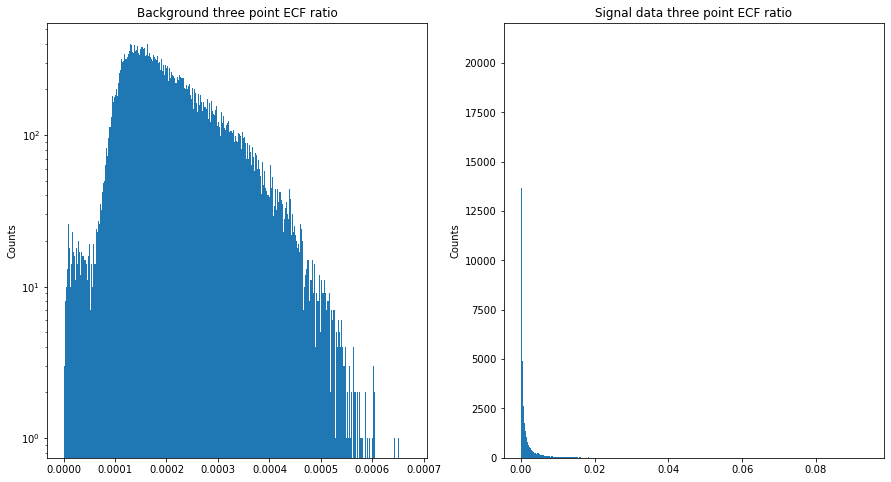

In [33]:
fig, a = plt.subplots(1, 2, figsize = (15, 8))

a[0].hist(higgs_data.get('ee3'), bins = 1000)
a[0].set_title('Background three point ECF ratio')
a[0].set_ylabel('Counts')
a[0].set_yscale('log')
a[1].hist(qcd_data.get('ee3'), bins = 1000)
a[1].set_title('Signal data three point ECF ratio')
a[1].set_ylabel('Counts')

plt.show()

As above, but now we examine the ECF $\sum_{i&lt;j&lt;k \in J} p_{T,i} p_{T,j} p_{T,k} \Delta R_{ij} \Delta R_{ik} \Delta R_{jk} \frac{1}{p_{T,J}^3}$. We expect this is more sharply peaked, and it is; if the likelihood of finding two particles in a jet with uncorrelated energies was low, it is even less likely for three, as two of the particles are more likely to be adjacent. We note the background is both more sharply peaked and has a longer tail than the signal. The signal is distinguished by a very short tale. Neither has a clearly recognizable distribution at a glance.

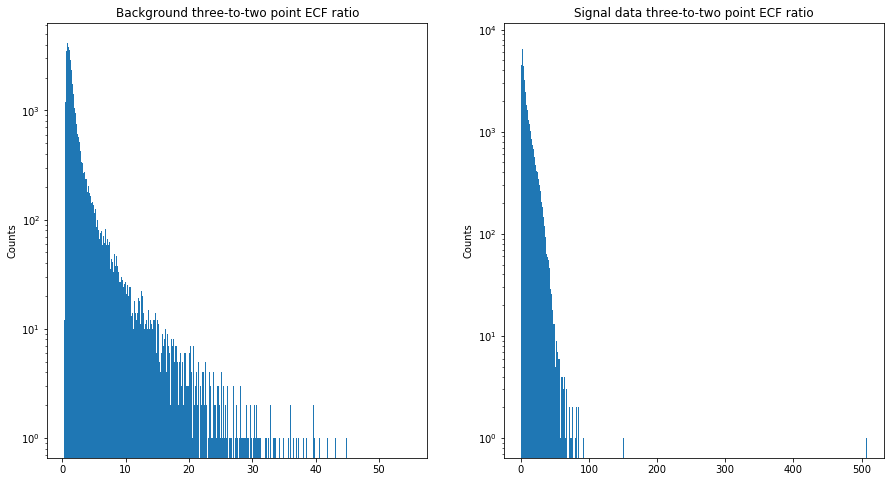

In [34]:
fig, a = plt.subplots(1, 2, figsize = (15, 8))

a[0].hist(higgs_data.get('d2'), bins = 1000)
a[0].set_title('Background three-to-two point ECF ratio')
a[0].set_ylabel('Counts')
a[0].set_yscale('log')
a[1].hist(qcd_data.get('d2'), bins = 1000)
a[1].set_title('Signal data three-to-two point ECF ratio')
a[1].set_ylabel('Counts')
a[1].set_yscale('log')

plt.show()

This is the ratio ee3 / (ee2)^3. As before the signal data has a smaller tail than the background.

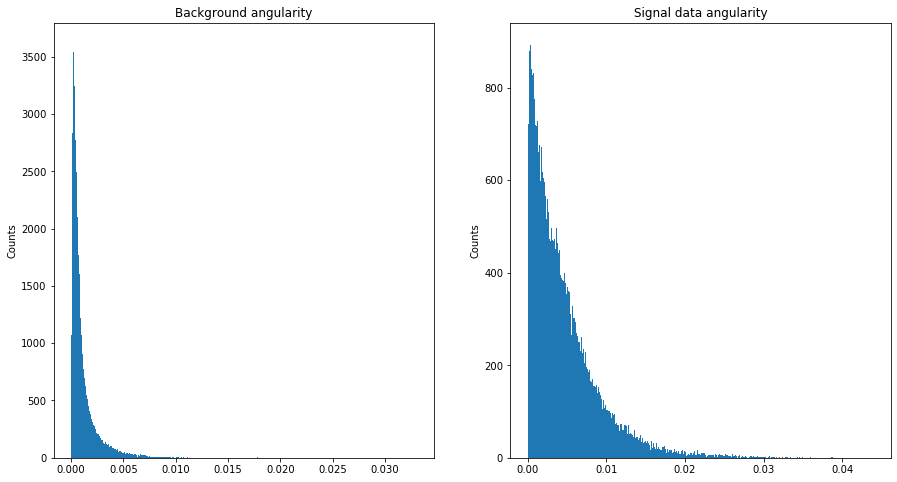

In [35]:
fig, a = plt.subplots(1, 2, figsize = (15, 8))

a[0].hist(higgs_data.get('angularity'), bins = 1000)
a[0].set_title('Background angularity')
a[0].set_ylabel('Counts')
a[1].hist(qcd_data.get('angularity'), bins = 1000)
a[1].set_title('Signal data angularity')
a[1].set_ylabel('Counts')

plt.show()

Angularity is denoted by $\tau_{-2}$ and defined by $\tau_{-2} = \frac{1}{m_J} \sum_{i \in J} E_i sin^{-2}(\theta_i)cos^3(\theta_i)$, where $J$ is a jet and $i$ enumerates particles in the jet. We see this is several times more sharply peaked for the signal than the background, and the tail is much more negligible than for the background, too.

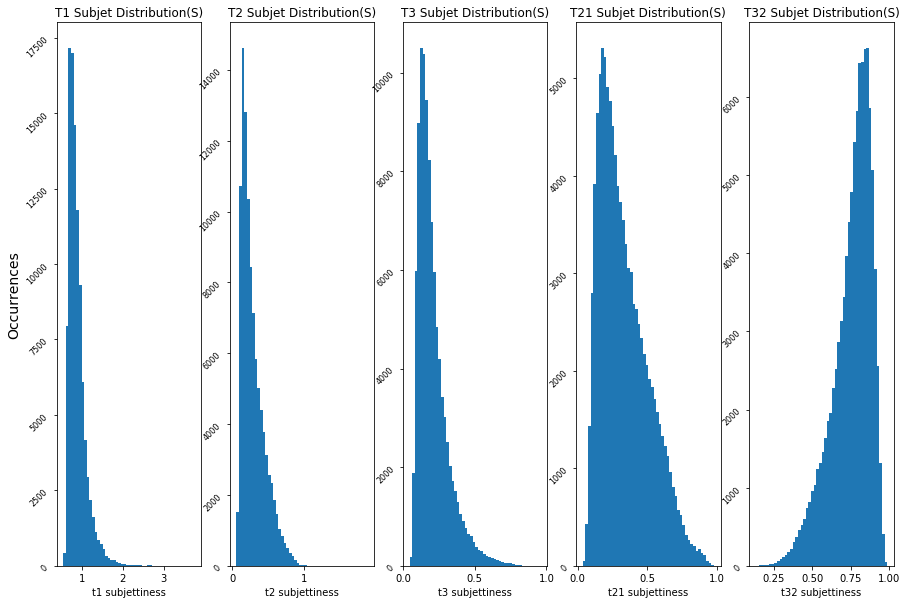

In [36]:
plt.rcParams["figure.figsize"] = (15,10)
    
bins = 50    

plt.subplot(151)
plt.yticks(fontsize=8, rotation=45)
plt.hist(higgs_data['t1'][:], bins, histtype = 'bar') 
plt.xlabel('t1 subjettiness', fontsize=10) 
plt.ylabel('Occurrences', fontsize=14) 
plt.title('T1 Subjet Distribution(S)', fontsize=12) 

plt.subplot(152)
plt.yticks(fontsize=8, rotation=45)
plt.hist(higgs_data['t2'][:], bins, histtype = 'bar') 
plt.xlabel('t2 subjettiness', fontsize=10) 
plt.title('T2 Subjet Distribution(S)', fontsize=12) 

plt.subplot(153)
plt.yticks(fontsize=8, rotation=45)
plt.hist(higgs_data['t3'][:], bins, histtype = 'bar') 
plt.xlabel('t3 subjettiness', fontsize=10) 
plt.title('T3 Subjet Distribution(S)', fontsize=12) 

plt.subplot(154)
plt.yticks(fontsize=8, rotation=45)
plt.hist(higgs_data['t21'][:], bins, histtype = 'bar') 
plt.xlabel('t21 subjettiness', fontsize=10) 
plt.title('T21 Subjet Distribution(S)', fontsize=12) 

plt.subplot(155)
plt.yticks(fontsize=8, rotation=45)
plt.hist(higgs_data['t32'][:], bins, histtype = 'bar') 
plt.xlabel('t32 subjettiness', fontsize=10) 
plt.title('T32 Subjet Distribution(S)', fontsize=12) 

plt.show()

The subjettiness of the signal data set is right skewed at low subjettiness, but as the subjettiness increases, the histograms slowly creep to the right, coming to a left skew at 32-subjettiness.

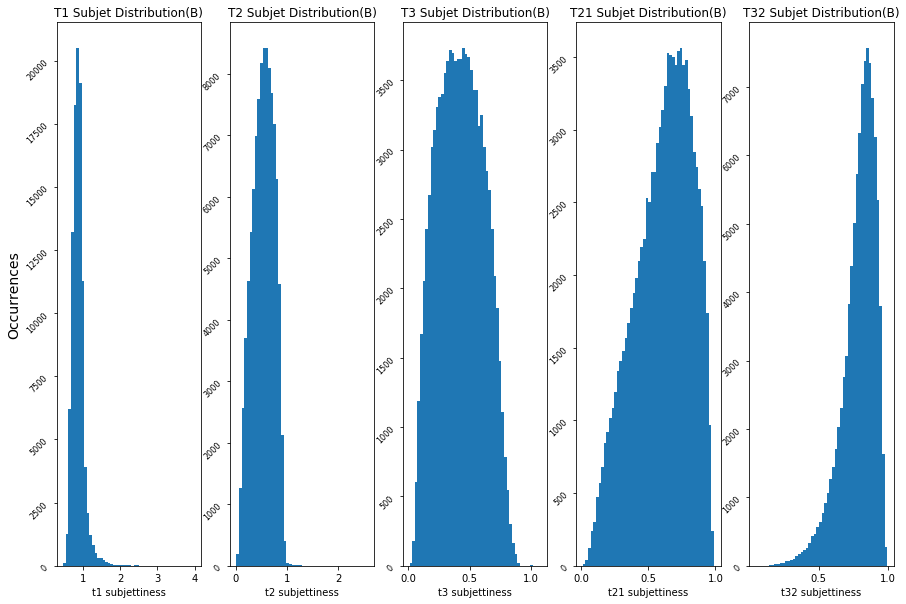

In [37]:
plt.rcParams["figure.figsize"] = (15,10)
    
bins = 50    

plt.subplot(151)
plt.yticks(fontsize=8, rotation=45)
plt.hist(qcd_data['t1'][:], bins, histtype = 'bar') 
plt.xlabel('t1 subjettiness', fontsize=10) 
plt.ylabel('Occurrences', fontsize=14) 
plt.title('T1 Subjet Distribution(B)', fontsize=12) 

plt.subplot(152)
plt.yticks(fontsize=8, rotation=45)
plt.hist(qcd_data['t2'][:], bins, histtype = 'bar') 
plt.xlabel('t2 subjettiness', fontsize=10) 
plt.title('T2 Subjet Distribution(B)', fontsize=12) 

plt.subplot(153)
plt.yticks(fontsize=8, rotation=45)
plt.hist(qcd_data['t3'][:], bins, histtype = 'bar') 
plt.xlabel('t3 subjettiness', fontsize=10) 
plt.title('T3 Subjet Distribution(B)', fontsize=12) 

plt.subplot(154)
plt.yticks(fontsize=8, rotation=45)
plt.hist(qcd_data['t21'][:], bins, histtype = 'bar') 
plt.xlabel('t21 subjettiness', fontsize=10) 
plt.title('T21 Subjet Distribution(B)', fontsize=12) 

plt.subplot(155)
plt.yticks(fontsize=8, rotation=45)
plt.hist(qcd_data['t32'][:], bins, histtype = 'bar') 
plt.xlabel('t32 subjettiness', fontsize=10) 
plt.title('T32 Subjet Distribution(B)', fontsize=12) 

plt.show()

This same trend of transitioning from left skew to right skew can also be observed in the background data set. The difference is that there is a very clear point at 3-subjettiness where the plot looks gaussian. This same pattern is not observed in the signal data set where t1-21 subjettiness all the plots are right skew. Regardless, the end result is the same for both distributions, upon reaching 32-subjettiness both plots are left skew.

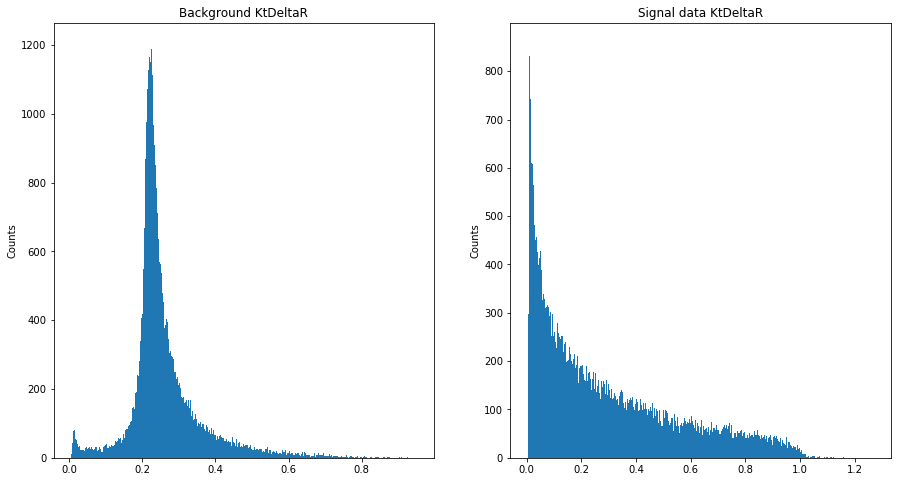

In [38]:
fig, a = plt.subplots(1, 2, figsize = (15, 8))

a[0].hist(higgs_data.get('KtDeltaR'), bins = 1000)
a[0].set_title('Background KtDeltaR')
a[0].set_ylabel('Counts')
a[1].hist(qcd_data.get('KtDeltaR'), bins = 1000)
a[1].set_title('Signal data KtDeltaR')
a[1].set_ylabel('Counts')

plt.show()

The delta R of two subjets distribution with a large-R jet is somewhat gaussian in the signal data set, with a mean around 0.22. The background dataset on the other hand follows no such pattern, being right skew all the way through.

In [39]:
qcd_data.corr()

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
pt,1.000000,0.000083,-0.006469,0.095461,0.012772,0.006981,-0.003817,0.032309,-0.010783,-0.027798,-0.033102,-0.027596,-0.024690,0.024390
eta,0.000083,1.000000,0.001784,0.000767,0.000499,0.001447,-0.002371,0.000908,-0.002803,-0.001568,-0.001840,-0.000351,-0.000405,-0.002086
phi,-0.006469,0.001784,1.000000,-0.005159,-0.003282,-0.003464,0.001273,-0.008891,0.002601,0.000465,0.001326,-0.000321,0.002848,-0.003087
mass,0.095461,0.000767,-0.005159,1.000000,0.959965,0.793991,-0.538750,0.529638,0.010450,-0.533355,-0.621826,-0.585519,-0.459640,0.708356
ee2,0.012772,0.000499,-0.003282,0.959965,1.000000,0.844699,-0.567445,0.427854,0.126657,-0.517926,-0.620038,-0.613574,-0.495083,0.614471
ee3,0.006981,0.001447,-0.003464,0.793991,0.844699,1.000000,-0.306321,0.433308,0.138780,-0.250764,-0.350501,-0.323984,-0.412092,0.459877
d2,-0.003817,-0.002371,0.001273,-0.538750,-0.567445,-0.306321,1.000000,-0.184381,-0.022127,0.554533,0.622112,0.619491,0.325022,-0.392433
angularity,0.032309,0.000908,-0.008891,0.529638,0.427854,0.433308,-0.184381,1.000000,-0.052497,-0.152266,-0.196199,-0.155062,-0.190053,0.406357
t1,-0.010783,-0.002803,0.002601,0.010450,0.126657,0.138780,-0.022127,-0.052497,1.000000,0.326725,0.238284,-0.002957,-0.146209,-0.271773
t2,-0.027798,-0.001568,0.000465,-0.533355,-0.517926,-0.250764,0.554533,-0.152266,0.326725,1.000000,0.936640,0.926364,0.129887,-0.635300


Above one can see the correlation functions and these are the most significant correlations:
* mass and ee2
* t2 and t3
* t2 and t21
* t3 and t21